In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.wcs.utils import wcs_to_celestial_frame
from astropy.table import Table
from astropy.nddata import Cutout2D
import astropy.units as u

from hda_fits.fits import column_dtype_byte_to_string

plt.rcParams["figure.figsize"] = (12, 8)

## Create table subset including P205+55 entries

In [ ]:
tab_shim = Table.read("../data/LOFAR_HBA_T1_DR1_catalog_v1.0.srl.fits")

In [107]:
tab_shim_cutout = tab_shim[181000:190000:200]
tab_shim_cutout

Source_Name,RA,E_RA,E_RA_tot,DEC,E_DEC,E_DEC_tot,Peak_flux,E_Peak_flux,E_Peak_flux_tot,Total_flux,E_Total_flux,E_Total_flux_tot,Maj,E_Maj,Min,E_Min,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,PA,E_PA,DC_PA,E_DC_PA,Isl_rms,S_Code,Mosaic_ID,Isl_id
,deg,arcsec,arcsec,deg,arcsec,arcsec,mJy / beam,mJy / beam,mJy / beam,mJy,mJy,mJy,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,deg,deg,deg,deg,mJy / beam,,,
bytes24,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,bytes11,int32
ILTJ123928.47+501007.0,189.8686430928731,0.4699795962397821,0.47840270013773895,50.168623882612444,0.1876152735284323,0.20781677862607542,0.4395355025487594,0.053349350243015584,0.10282904011699986,0.3771971011388885,0.10205461923169826,0.12691040710213705,7.097571252155181,1.1200571034115947,4.353771762073249,0.4064485740565827,0.0,1.1200571034115947,0.0,0.4064485740565827,98.09564258933236,10.760888004966365,0.0,10.760888004966365,0.0581807253183797,S,P30Hetdex06,6247
ILTJ123850.18+491445.3,189.70908427745266,0.5987684259658976,0.6054023047123701,49.24594175623416,0.6198035792742618,0.6262146592811101,0.3188030288367504,0.061573813398801004,0.08863830630314301,0.4882731099870276,0.09350426387409462,0.13520159969502019,7.512539277356163,1.4644568119550294,7.34138239447226,1.4048671745624908,4.520855974820549,1.4644568119550294,4.227980135690108,1.4048671745624908,15.325612413105556,178.53019924724106,15.325612413099194,178.53019924724106,0.057258654123870656,S,P30Hetdex06,6479
ILTJ125207.19+482815.3,193.02997646757674,1.6377715317583346,1.6402084967635706,48.47094121913236,0.8431692413243378,0.8478930900371993,0.29856899222474903,0.0816765381990649,0.1011770458992918,0.8312747696468509,0.10772974375015068,0.19810706043584145,12.571331655632699,3.884667843603432,7.975961643805509,1.9315931666259396,11.046521379446256,3.884667843603432,5.2537468734740305,1.9315931666259396,83.29691280312228,33.88340563915344,83.2969128031222,33.88340563915344,0.07868387183407322,S,P30Hetdex06,6890
ILTJ124749.34+501209.9,191.95560329112047,0.9959512956556013,0.9999536518936474,50.20276624773498,0.8553491664293043,0.8600061157507407,0.2192704489059347,0.06286148315809219,0.07664689984188214,0.3420794245918834,0.09513988971249028,0.11718503284835217,8.071988142974348,2.4524376283051574,6.958010432484738,1.8822471820567854,5.399720410704251,2.4524376283051574,3.5229573243510557,1.8822471820567854,63.10293425380601,85.51839984790847,63.10293425380458,85.51839984790847,0.05858446820639074,S,P30Hetdex06,7098
ILTJ124446.96+504646.2,191.19566990814678,1.6444115522584697,1.6468386914991038,50.77950568018794,1.073981025329465,1.077693632432288,0.20503540801073342,0.06177834452002356,0.07414947466543402,0.5921168797267368,0.08062189049223391,0.1432619460876992,12.063193546002985,3.9656356025416324,8.619751211006628,2.3804497642001747,10.465049999710724,3.9656356025416324,6.187962910701714,2.3804497642001747,74.04473536583961,45.36606594757874,74.04473536583939,45.36606594757874,0.05892570334253833,S,P30Hetdex06,7302
ILTJ124146.40+500637.0,190.44334886543868,1.2105974334240865,1.2138922804064438,50.110277424954674,0.7625147380841182,0.767735011845143,0.2583428274785984,0.07242367807233724,0.08896532923510717,0.46722360485700154,0.10561120114562814,0.14101645891471387,9.236244511450632,2.851271515614767,7.049916968628513,1.7947715796723622,7.021521533799566,2.851271515614767,3.701314207884716,1.7947715796723622,90.09812988359305,48.5065385802897,90.09812988359307,48.5065385802897,0.06747802399331704,S,P30Hetdex06,7527
ILTJ124545.03+502300.4,191.43761157295373,2.3798825687536325,2.38156027924442,50.38345747170987,2.107020706915195,2.108915499015259,0.15927121394938154,0.05785780895092803,0.06604709562364172,0.9197502099144209,0.06714284844235072,0.19582078552201074,15.604151953928463,5.802414984792951,13.323639330194002,4.728284906428323,14

Store as fits.table

In [108]:
#tab_shim_cutout.write("../tests/data/catalog_shimwell_reduced.srl.fits", overwrite=True)

In [110]:
tab_cu = tab_shim_cutout.to_pandas()
tab_cu = column_dtype_byte_to_string(tab_cu)
tab_p205 = tab_cu[tab_cu.Mosaic_ID.str.contains("P205")].loc[:, ["Source_Name", "RA", "DEC", "Mosaic_ID"]]

## Create a mosaic cutout

In [127]:
hdu = fits.open("../data/P205+55-mosaic.fits")[0]
wcs = WCS(hdu.header)

In [128]:
_, _, ra, dec, _ = tab_p205.to_records()[0]
position = wcs.wcs_world2pix([(ra, dec)], 0)
position

array([[1596.77230429, 5209.68648555]])

In [129]:
cutout = Cutout2D(hdu.data, position=position[0], size=600, wcs=wcs)
cutout

In [130]:
hdu.data = cutout.data
hdu.header.update(cutout.wcs.to_header())

In [131]:
#hdu.writeto("../tests/data/P205+55_test_cutout.fits", overwrite=True)

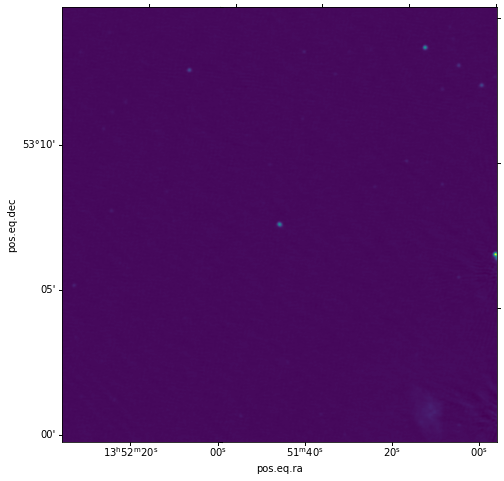

In [132]:
ax = plt.subplot(projection=wcs)
ax.imshow(cutout.data);